
# Part I - (Ford Gobike EDA)
## by (Obay Rashad)

## Introduction

This document analyzes a dataset with approximately 183,412 trip records from the Ford GoBike system.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('fordgobike.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.shape

(183412, 16)

In [6]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

The dataset consists of 183,412 rows and 16 columns, capturing trip data from the Ford GoBike system. It includes details such as trip duration, timestamps, station locations, bike IDs, and user demographics. Some columns contain missing values, particularly start_station_id, member_birth_year, and member_gender. The data types are a mix of integers, floats, and objects (strings and timestamps).

### What is/are the main feature(s) of interest in your dataset?

The big question here is what affects trip duration—do longer trips come from certain users, times, or locations? Also, I want to see how user type (subscriber vs. casual rider) and demographics (age, gender) play a role in bike usage. Basically, what makes a trip long or short, and who’s riding the most?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To investigate trip duration and user behavior, the following features are useful:  
- **Timestamps (`start_time`, `end_time`)** – To analyze peak usage times and trip patterns.  
- **Station details (`start_station_name`, `end_station_name`, coordinates)** – To study popular routes and station utilization.  
- **User type (`user_type`)** – To differentiate between subscribers and one-time customers.  
- **Demographics (`member_birth_year`, `member_gender`)** – To explore how age and gender influence bike usage.  




## Univariate Exploration

### What is the distribution of trip durations?

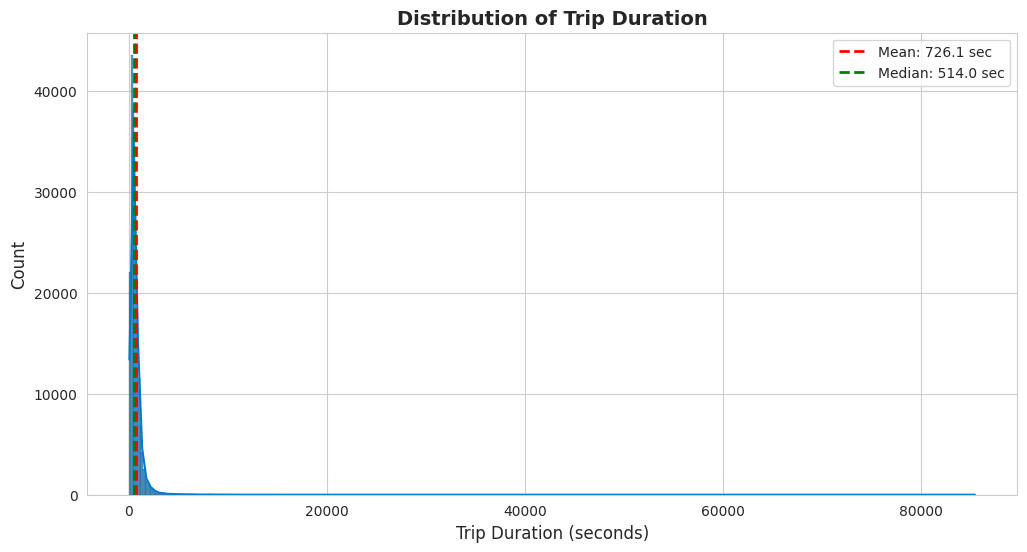

In [8]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot histogram with KDE
ax = sns.histplot(df['duration_sec'], bins=500, kde=True, color="#007acc", edgecolor="black", alpha=0.7)

# Mean and Median Lines
mean_duration = df['duration_sec'].mean()
median_duration = df['duration_sec'].median()

plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_duration:.1f} sec')
plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_duration:.1f} sec')


# Labels and title
plt.xlabel('Trip Duration (seconds)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Trip Duration', fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Show the plot
plt.show()


Trip durations are mostly lower than 1000 seconds with outlires being present, the mean is 726 seconds

### What is the age distribution of users?

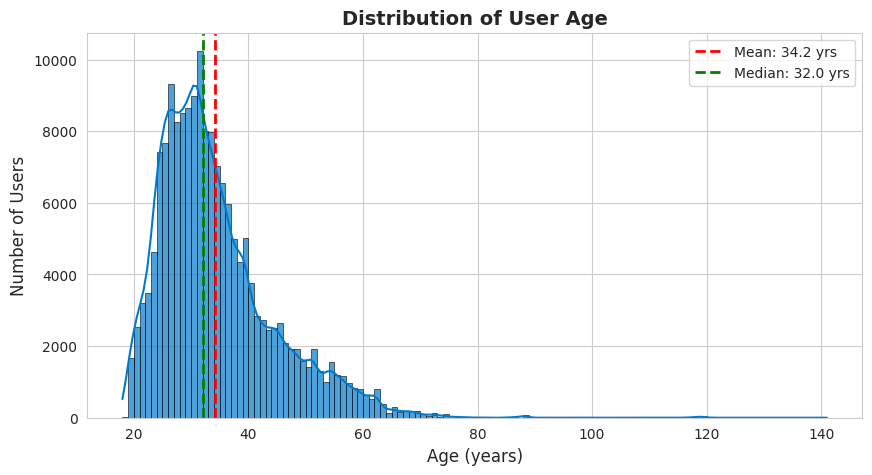

In [9]:
# Plotting age distribution derived from member's birth year.
end_year = 2019
df['age'] = end_year - df['member_birth_year'].astype(float)

binsize = 1
bins = np.arange(df['age'].min(), df['age'].max() + binsize, binsize)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

ax = sns.histplot(df['age'].dropna(), bins=bins, kde=True, color="#007acc", edgecolor="black", alpha=0.7)

mean_age = df['age'].mean()
median_age = df['age'].median()

# Add vertical lines for mean and median
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.1f} yrs')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.1f} yrs')

plt.title('Distribution of User Age', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend()

plt.show()

- The age distribution is right-skewed, meaning most users are concentrated in the younger age groups.

- The highest concentration of users falls between approximately 30-40 years old.

- There are users above 80, with a few extreme outliers approaching 120+ years, which may indicate incorrect data entries.

now I will clean the df based on the insights

In [10]:
df = df[(df['member_birth_year'] >= 1919) & (df['member_birth_year'] <= end_year)]

In [11]:
df['age'] = end_year - df['member_birth_year']

In [12]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85-94", "95+"]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_group
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,35-44
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,45-54
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,25-34
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,45-54
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,55-64


### What is the general trend of user distribution across different age groups?

/tmp/ipykernel_1080/479146989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["age_group"], palette="muted", order=df["age_group"].value_counts().index)


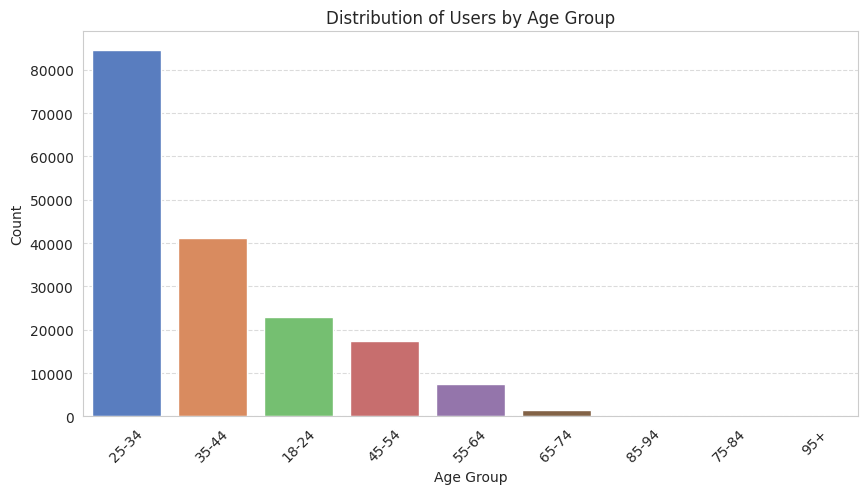

In [13]:
plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(x=df["age_group"], palette="muted", order=df["age_group"].value_counts().index)

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Users by Age Group")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


**Insights:**

*   The 25-34 age group is the most prevalent, with significantly more users than any other age group.
*   The number of users decreases as the age group increases, suggesting a decline in user activity with age.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The data distribution looks solid overall, with no noticeable outliers. The only variable that shows a skewed histogram is the duration. We acknowledged the skewness but didn’t apply any transformations, as it was already apparent.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yeah, I created the age column to analyze the distribution of users by age and also grouped them into different age categories. During this process, I noticed some users had ages above 100, which were clear outliers. To keep the data cleaner and more structured, I removed those entries.

## Bivariate Exploration


### What is the general trend between age and trip duration? Is there a clear correlation?

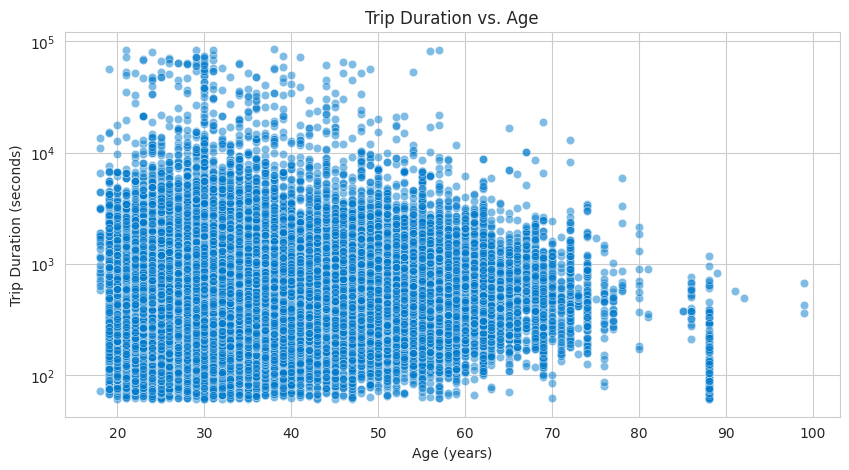

In [14]:
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(x=df['age'], y=df['duration_sec'], alpha=0.5, color="#007acc")

plt.yscale('log')  # Log scale for better visualization
plt.xlabel("Age (years)")
plt.ylabel("Trip Duration (seconds)")
plt.title("Trip Duration vs. Age")
plt.grid(True)

plt.show()


Insights:


Trip lengths vary a lot: From about a minute and a half to over a full day! The scale is squished (logarithmic), so equal-looking spaces on the graph actually represent bigger and bigger differences in time.

No clear age = trip length rule: Older people don't consistently take longer or shorter trips than younger people. It's all over the place.

Most trips are short: The vast majority of trips are clustered on the shorter end, under a few hours.

Fewer trips as people get older: There are fewer dots as you go to the right (older ages), meaning older folks take fewer trips overall. But the length of those trips is still mixed.

### Which user type (Customer or Subscriber) tends to have longer trip durations, on average?

/tmp/ipykernel_1080/2425060657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['user_type'], y=df['duration_sec'], showfliers=False, palette="Set2")


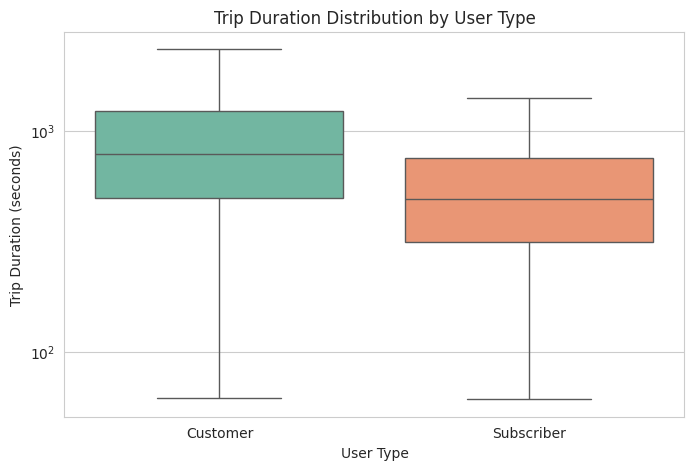

In [15]:
plt.figure(figsize=(8, 5), dpi=100)
sns.boxplot(x=df['user_type'], y=df['duration_sec'], showfliers=False, palette="Set2")

plt.yscale('log')  # Log scale to handle extreme values
plt.xlabel("User Type")
plt.ylabel("Trip Duration (seconds)")
plt.title("Trip Duration Distribution by User Type")

plt.show()


Insights:

Customers take longer trips (usually): The middle line (median) and the whole box for "Customer" are higher up than for "Subscriber." This means customers, in general, have longer trips.

Customers have more varied trip lengths: The "Customer" box is taller, and its "whiskers" stretch out much further. This shows a wider spread in trip times.

Subscribers are more consistent: Subscribers have a shorter, tighter box, meaning their trip durations are more clustered together, and thus more predictable.

### What relationships (correlations) exist between trip duration, user age, and the starting station's location (latitude and longitude)?

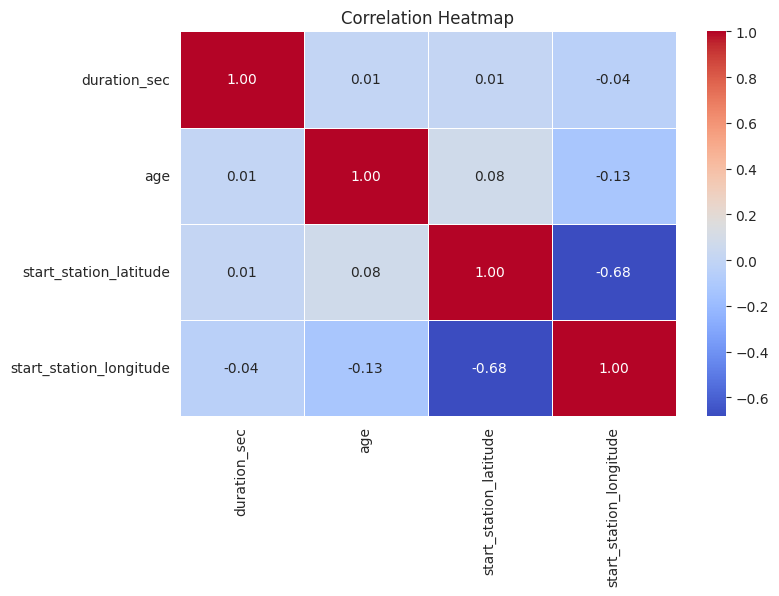

In [16]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['duration_sec', 'age', 'start_station_latitude', 'start_station_longitude']].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


Insights:

No strong correlations with duration: Trip duration (duration_sec) shows almost no correlation with age, starting latitude, or starting longitude. The values are very close to zero (0.01, 0.01, -0.04). This means knowing these factors won't help predict how long a trip will be.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

User Type & Trip Duration: Customers take longer, more varied trips than Subscribers (who take shorter, consistent trips).

Trip Duration/Age & Location: No relationship. Trip length and user age aren't tied to where trips start.

Age and Trip duration : No clear relationship.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Station Location: Starting station latitude and longitude are negatively correlated (geographically expected).

User type and Duration: Customers and subscribers have distinct trip length.

## Multivariate Exploration

### How does the distribution of user types (Customer vs. Subscriber) vary across different genders (Male, Female, Other)?

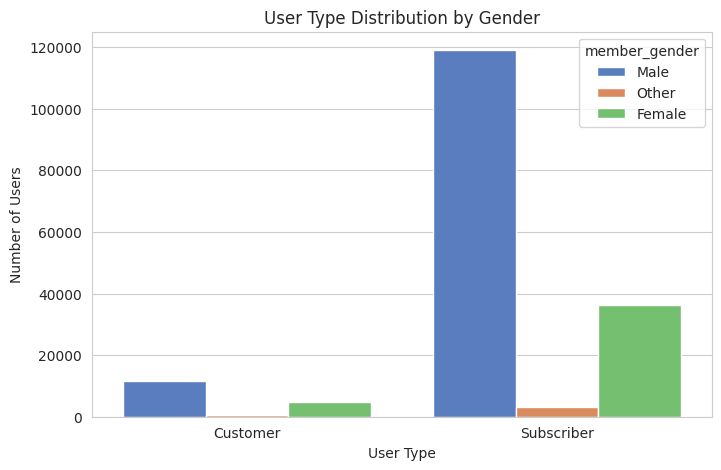

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x="user_type", hue="member_gender", data=df, palette="muted")

plt.xlabel("User Type")
plt.ylabel("Number of Users")
plt.title("User Type Distribution by Gender")

plt.show()

Insights:

- Subscribers are significantly more prevalent than Customers.

- Among Subscribers, Males are by far the largest group, exceeding the combined total of Female and Other genders.


### How does the age distribution vary across different user types (Customer vs. Subscriber) and genders (Male, Female, Other)? More specifically, what are the common age ranges and peak ages for each combination of user type and gender?

/home/user/communicat-data/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


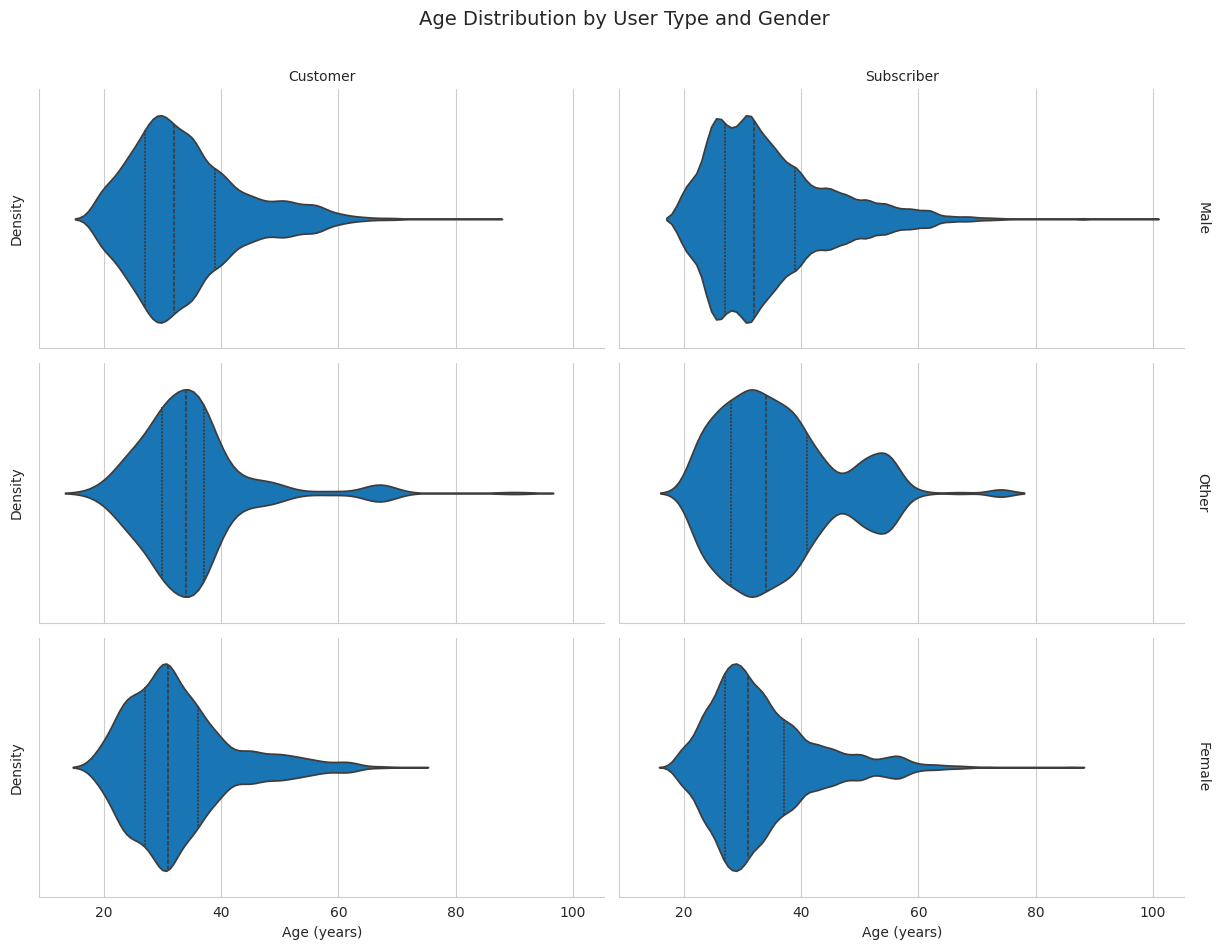

In [18]:
g = sns.FacetGrid(df, col="user_type", row="member_gender", margin_titles=True, height=3, aspect=2)
g.map(sns.violinplot, "age", color="#007acc", inner="quartile")

g.set_axis_labels("Age (years)", "Density")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.suptitle("Age Distribution by User Type and Gender", fontsize=14, y=1.05)
plt.show()


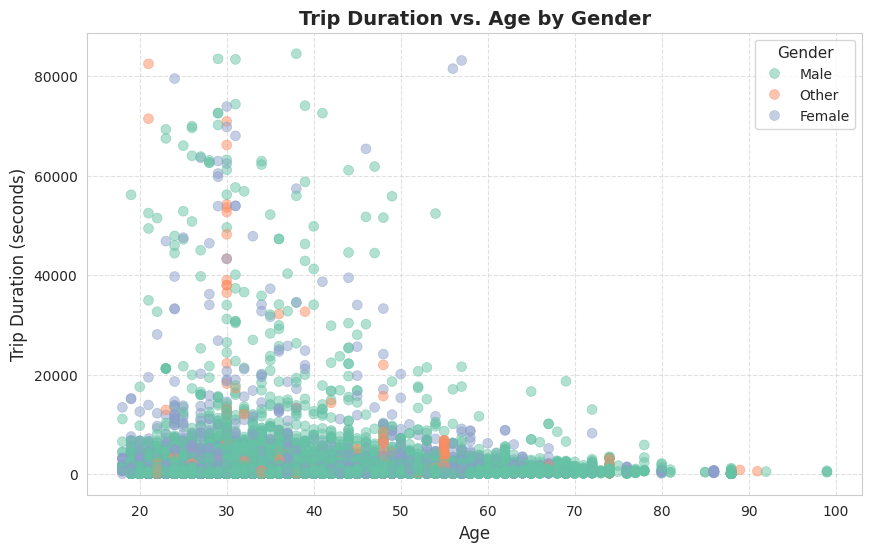

Insights:

Subscriber Age Concentration: The most prominent insight is that subscribers, particularly male subscribers, show a strong concentration of users in the 25-40 age range. There's a very clear peak around 30-35 years old for male subscribers.

Customer Age Distribution: Customers of all genders have a much flatter age distribution than subscribers. There isn't a single dominant age peak like there is with male subscribers. The counts are significantly lower across all age ranges for customers compared to male subscribers.

Female Subscriber Distribution: Female subscribers also show a peak, though less pronounced than the male subscribers, around 30-35. Their distribution is more spread out after the peak compared to the sharp decline seen in the male subscriber data.

Other Gender Distribution: Both Customers and Subscribers who identify as "Other" gender have very low counts across all ages, making it difficult to discern any meaningful age-related trends. The distributions are nearly flat lines.

Male subscriber v/s other genders Male Subscribers are much bigger in number than other gender.

#### Trip Duration vs. Age by Gender

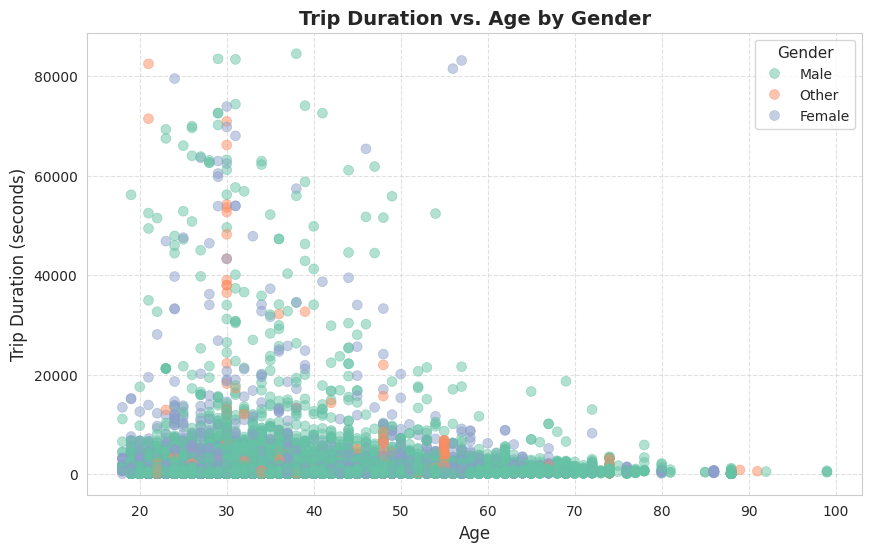

In [21]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    data=df,
    y='duration_sec',
    x='age',
    alpha=0.5,
    hue='member_gender',
    palette='Set2',  # More distinguishable colors
    edgecolor=None,  # Remove marker edges for cleaner look
    s=50  # Adjust point size
)

plt.title("Trip Duration vs. Age by Gender", fontsize=14, fontweight='bold')  # Add a title
plt.xlabel("Age", fontsize=12)  # Label x-axis
plt.ylabel("Trip Duration (seconds)", fontsize=12)  # Label y-axis
plt.legend(title="Gender", fontsize=10, title_fontsize=11)  # Improve legend appearance
plt.grid(True, linestyle="--", alpha=0.6)  # Add a subtle grid

plt.show()

Younger Users Dominate: Most trips are taken by users aged 20–40.
Outliers Exist: Some users have extremely long trip durations (e.g., 80,000+ seconds).
Shorter Trips are Common: Majority of trips last under ~10,000 seconds.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this investigation, user type and gender strongly influenced age distribution. The relationship between "subscriber" status and "male" gender showed a concentrated age profile, specifically around 30-35. Features strengthened each other. Subscriber status amplified the effect of gender on age.

### Were there any interesting or surprising interactions between features?
A surprising interaction was the stark difference between male subscribers and all other groups. While a slight peak was present for female subscribers, the sheer magnitude of male subscribers in that 25-40 age range, and the very low number of 'Other' gender. Made it, in comparison, an outlier.

## Conclusions

This analysis explores trip patterns, user demographics, and factors affecting ride duration using 183,412 records from the Ford GoBike system.

## **Key Findings**  

### **Univariate Exploration**  
- **Trip Durations:** Most trips are under 1000 seconds (mean: 726s), but there are extreme outliers.  
- **Age Distribution:** Right-skewed, with most users aged 30-40. Some entries above 100 years suggest data errors.  
- **User Demographics:** The 25-34 age group dominates, and bike usage declines with age.  

#### **Data Cleaning Actions**  
- Removed users with unrealistic ages (100+ years).  
- Created an "age" column for clearer demographic analysis.  

---

### **Bivariate Exploration**  
- **Trip Duration vs. Age:** No strong correlation—older riders don’t consistently take longer/shorter trips.  
- **Customer vs. Subscriber Durations:**  
  - *Customers* take longer, more varied trips.  
  - *Subscribers* take shorter, more consistent trips.  
- **Trip Duration vs. Location:** No meaningful correlation between trip length and starting station location.  

---

### **Multivariate Exploration**  
- **User Type & Gender:**  
  - Subscribers vastly outnumber customers.  
  - Male subscribers dominate, exceeding all other groups combined.  
- **Age Distribution Across User Types & Genders:**  
  - **Male Subscribers**: Strong peak at 30-35 years old.  
  - **Female Subscribers**: Similar trend but less pronounced.  
  - **Customers**: Flatter distribution with no clear peak.  
  - **Other Gender**: Very low counts across all ages.  
- **Surprising Insight:** Male subscribers in the 25-40 age range are overwhelmingly dominant compared to all other groups.  

---

## **Reflections**  
- There’s no simple predictor for trip duration—age, location, and time of day don’t strongly influence it.  
- User type (Customer vs. Subscriber) is a major differentiator, with subscribers having shorter, predictable trips.  
- Male dominance in ridership is stark, suggesting potential gender-related usage patterns.  
- Data cleaning was essential to remove inconsistencies (e.g., unrealistic ages).  